# Question 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from numpy import linalg as LA
import time

In [2]:
# Load the data
df1 = pd.read_csv('DailyReturn.csv')

df1.describe()

,SPY,AAPL,MSFT,AMZN,TSLA,GOOGL,GOOG,FB,NVDA,BRK-B,...,PNC,MDLZ,MO,ADI,GILD,LMT,SYK,GM,TFC,TJX
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,0.000545,0.002621,0.000307,-0.000735,0.004213,-0.000149,-0.000193,-0.000239,0.003998,0.002046,...,0.000940,0.002169,0.001204,-0.000283,0.001397,0.000368,-0.000264,0.001321,0.001170,0.002008
std,0.008858,0.016045,0.015962,0.016150,0.045304,0.015734,0.015441,0.020170,0.037776,0.009513,...,0.016112,0.009950,0.013226,0.015763,0.009694,0.017698,0.016130,0.027013,0.017359,0.016656
min,-0.022303,-0.039264,-0.042323,-0.028955,-0.119903,-0.045876,-0.046830,-0.050515,-0.068026,-0.021688,...,-0.040886,-0.029195,-0.061474,-0.052368,-0.036531,-0.118035,-0.045738,-0.064547,-0.044681,-0.029659
25%,-0.003467,-0.005858,-0.007011,-0.012032,-0.028789,-0.006252,-0.006575,-0.011258,-0.020726,-0.003575,...,-0.007753,-0.004030,-0.004497,-0.009405,-0.002643,-0.002608,-0.009071,-0.012228,-0.007525,-0.010743
50%,0.000877,0.001231,0.000594,-0.001731,0.006190,-0.000209,0.000146,-0.001346,0.003557,0.002374,...,0.000010,0.002768,0.000778,0.001834,0.001503,0.002196,-0.000719,0.000814,0.002934,0.003680
75%,0.005470,0.015612,0.009943,0.007864,0.033007,0.008939,0.009319,0.015175,0.022704,0.006907,...,0.007888,0.007577,0.011255,0.009600,0.008275,0.007700,0.004827,0.014109,0.012137,0.010750
max,0.020685,0.035446,0.042114,0.041437,0.135317,0.049595,0.048367,0.040123,0.120423,0.025732,...,0.038514,0.022086,0.030244,0.030819,0.022914,0.021532,0.034833,0.074710,0.037457,0.058273


In [3]:
# Write the function to get the exponentially weighted covariance matrix

def ewm (dataFrame, expect_weight, lamda):
    weight = []
    sum_weight = 0
    for i in range(1, 61):
        weight.append((1-lamda)*lamda**(i-1))
        sum_weight = sum_weight + weight[i-1]
    for i in range(0,60):   
        expect_weight.append(weight[i] / sum_weight)
    
    
    cov_matrix = np.zeros([101,101])
    for i in range (0,60):
        for j in range (1,102):
            dataFrame.iloc[i,j] = dataFrame.iloc[i,j] - np.mean(dataFrame.iloc[:,j])
    
            
    for i in range (0,101):
        for j in range (0,101):
            #cov_matrix.iloc[i,j] = sum( np.dot( np.dot(expect_weight, dataFrame.iloc[:,i+1]) ), np.transpose(dataFrame.iloc[:, j+1]) )
            temp = expect_weight * dataFrame.iloc[:,i+1]
            cov_matrix[i,j] = np.dot(temp, dataFrame.iloc[:, j+1])
            
    return cov_matrix

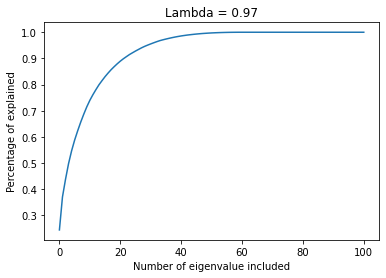

In [4]:
# Lambda = 0.97
expect_weight_1 = []
cov_matrix_1 = ewm(df1, expect_weight_1, 0.97)

value_1, vector_1 = LA.eigh(cov_matrix_1)
value_1 = value_1[::-1]

total_1 = 0
for i in range(len(value_1)):
    total_1 = total_1 + value_1[i]
    
cumu_var_1 = []
k = 1
for i in range(len(value_1)):
    sum_1 = 0
    for j in range(k):
        sum_1 = sum_1 + value_1[j]  
    cumu_var_1.append(sum_1 / total_1)
    k = k + 1
    
fig, ax = plt.subplots()
ax.set_title("Lambda = 0.97")
ax.set_xlabel('Number of eigenvalue included')
ax.set_ylabel('Percentage of explained')
ax.plot(cumu_var_1)

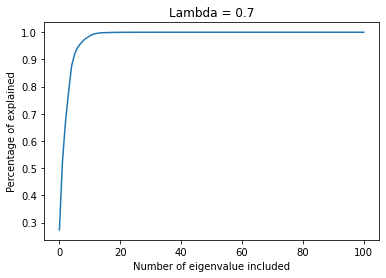

In [5]:
# Lambda = 0.7
expect_weight_2 = []
cov_matrix_2 = ewm(df1, expect_weight_2, 0.7)

value_2, vector_2 = LA.eigh(cov_matrix_2)
value_2 = value_2[::-1]

total_2 = 0
for i in range(len(value_2)):
    total_2 = total_2 + value_2[i]
    
cumu_var_2 = []
k = 1
for i in range(len(value_2)):
    sum_2 = 0
    for j in range(k):
        sum_2 = sum_2 + value_2[j]  
    cumu_var_2.append(sum_2 / total_2)
    k = k + 1
    
fig, ax = plt.subplots()
ax.set_title("Lambda = 0.7")
ax.set_xlabel('Number of eigenvalue included')
ax.set_ylabel('Percentage of explained')
ax.plot(cumu_var_2)

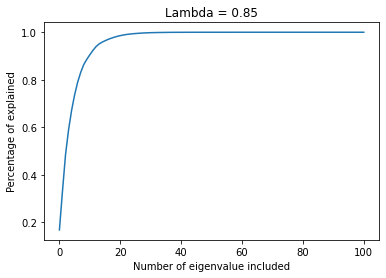

In [6]:
# Lambda = 0.85
expect_weight_3 = []
cov_matrix_3 = ewm(df1, expect_weight_3, 0.85)

value_3, vector_3 = LA.eigh(cov_matrix_3)
value_3 = value_3[::-1]

total_3 = 0
for i in range(len(value_3)):
    total_3 = total_3 + value_3[i]
    
cumu_var_3 = []
k = 1
for i in range(len(value_3)):
    sum_3 = 0
    for j in range(k):
        sum_3 = sum_3 + value_3[j]  
    cumu_var_3.append(sum_3 / total_3)
    k = k + 1
    
fig, ax = plt.subplots()
ax.set_title("Lambda = 0.85")
ax.set_xlabel('Number of eigenvalue included')
ax.set_ylabel('Percentage of explained')
ax.plot(cumu_var_3)

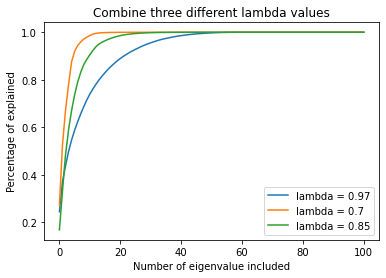

In [7]:
fig, ax = plt.subplots()
ax.set_title("Combine three different lambda values")
ax.set_xlabel('Number of eigenvalue included')
ax.set_ylabel('Percentage of explained')

ax.plot(cumu_var_1, label = 'lambda = 0.97')
ax.plot(cumu_var_2, label = 'lambda = 0.7')
ax.plot(cumu_var_3, label = 'lambda = 0.85')

ax.legend()

# Question 2

In [8]:
# non-psd correlation matrix that is 500x500
n = 500
sigma = np.full((n,n), 0.9)
for i in range(n):
    sigma[i,i] = 1.0
sigma[1,2] = 0.7357
sigma[2,1] = 0.7357

In [9]:
# determined whether the matix is psd
def is_psd(x):
    return np.all(np.linalg.eigvals(x) >= -1e-8)

In [10]:
# Near PSD function
def near_psd(A):
    n = A.shape[0]
    eigval, eigvec = LA.eigh(A)
    val = np.matrix(np.maximum(eigval, 0))
    vec = np.matrix(eigvec)
    
    T = 1/(np.multiply(vec,vec) * val.T)
    T = np.matrix(np.sqrt(np.diag(np.array(T).reshape((n)) ))) #already take the square root of T
    B = T * vec * np.diag(np.array(np.sqrt(val)).reshape((n)))
    out = B * B.T
    
    return out

In [11]:
# Higham PSD function

def _getAplus(A):
    eigval, eigvec = LA.eigh(A)
    Q = np.matrix(eigvec)
    xdiag = np.matrix(np.diag(np.maximum(eigval, 0)))
    return eigvec @ xdiag @ eigvec.T

def _getPs(A, W=None):
    W05 = np.matrix(W**.5)
    iW = W05.I
    return  iW @ _getAplus(W05 @ A @ W05) @ iW

def _getPu(A, W=None):
    Aret = A.copy()
    for i in range(0, A.shape[0]):
        Aret[i,i] = 1
    return Aret

def _wgtNorm(A, W = None):
    W05 = np.sqrt(W)
    W05 = W05 @ A @ W05
    return (W05 * W05).sum()

def higham_nearestPSD(pc, W = None, epsilon = 1e-9, maxIter = 100, tol = 1e-9):
    n = pc.shape[0]
    if W == None:
        W = np.identity(n)
        
    deltaS = np.zeros((n,n))
    
    Yk = pc.copy()
    norml = 9999999
    i = 1
    
    while i <= maxIter:
        Rk = Yk - deltaS
        Xk = _getPs(Rk, W)
        deltaS = Xk - Rk
        Yk = _getPu(Xk, W)
        norm = _wgtNorm(Yk - pc, W)
        
        w, v = LA.eigh(Yk)
        minEigVal = np.min(w)
        
        if ((norm - norml) < tol) and (minEigVal > -epsilon):
            break
            
        norml = norm
        i = i + 1
        
    if i < maxIter:
        print("Converged in %d iterations.\n" % i)
    else:
        print("Converged failed after %d iterations.\n" % (i-1))
        
    return Yk    

In [12]:
# Cholesky PSD Function
def chol_psd(root, a):
    n = a.shape[0]
    
    for j in range(n):
        s = 0.0
        if j>0:
            s = root[j, :j] @ root[j, :j].T
            
        temp = a[j, j] - s
        
        if -1e-8 <= temp <= 0:
            temp = 0.0
        
        root[j,j] = np.sqrt(temp);
        
        if root[j,j] == 0.0:
            continue
            
        ir = 1.0/root[j,j]
            
        for i in range(j+1, n):
                s = root[i, :j] @ root[j, :j].T
                root[i,j] = (a[i,j] - s) * ir
    return root

In [13]:
# Test whether the covariance is PSD after using near_psd function
out_near_psd = near_psd(sigma)
test_near_psd = is_psd(out_near_psd)
if test_near_psd == True:
    print("The covariance martix is PSD by using near PSD method.")

The covariance martix is PSD by using near PSD method.


In [14]:
# Test whether the covariance is PSD after using higham_nearestPSD function
out_higham_nearestPSD = higham_nearestPSD(sigma, W = None, epsilon = 1e-9, maxIter = 100, tol = 1e-9)
test_higham_nearestPSD = is_psd(out_higham_nearestPSD)
if test_higham_nearestPSD == True:
    print("The covariance martix is PSD by using Higham method.")

Converged in 26 iterations.

The covariance martix is PSD by using Higham method.


In [15]:
# Frobenius norm function
def F_norm (cov, cov_psd):
    temp = cov - cov_psd
    return LA.norm(temp, 'fro')

In [16]:
# Calculate the Frobenius norm for both methods.
near_psd_Fnorm = F_norm(sigma, out_near_psd)
higham_psd_Fnorm = F_norm(sigma, out_higham_nearestPSD)

print("Frobenius Norm of near PSD method is %f" % near_psd_Fnorm)
print("Frobenius Norm of Higham PSD method is %f" %higham_psd_Fnorm)

Frobenius Norm of near PSD method is 0.627523
Frobenius Norm of Higham PSD method is 0.089648


In [17]:
# Calculate time consuming
start1 = time.time()
near_psd(sigma)
end1 = time.time()
near_psd_time = end1 - start1

start2 = time.time()
higham_nearestPSD(sigma, W = None, epsilon = 1e-9, maxIter = 100, tol = 1e-9)
end2 = time.time()
higham_psd_time = end2 - start2

print("Near PSD method time consuming is %f" % near_psd_time)
print("Near Higham method time consuming is %f" % higham_psd_time)

Converged in 26 iterations.

Near PSD method time consuming is 0.028581
Near Higham method time consuming is 0.938344


In [18]:
name = ['nearPSD', 'Higham2002']

norm = []
norm.append(near_psd_Fnorm)
norm.append(higham_psd_Fnorm)

runtime = []
runtime.append(near_psd_time)
runtime.append(higham_psd_time)

resultTable = pd.DataFrame(list(zip(name,norm,runtime)), columns = ['Name','Norm', 'RunTime'])
resultTable

,Name,Norm,RunTime
0,nearPSD,0.627523,0.028581
1,Higham2002,0.089648,0.938344


# Question 3

In [19]:
# Cholesky PSD Function
def chol_psd(root, a):
    n = a.shape[0]
    
    for j in range(n):
        s = 0.0
        if j>0:
            s = root[j, :j] @ root[j, :j].T
            
        temp = a[j, j] - s
        
        if -1e-8 <= temp <= 0:
            temp = 0.0
        
        root[j,j] = np.sqrt(temp);
        
        if root[j,j] == 0.0:
            continue
            
        ir = 1.0/root[j,j]
            
        for i in range(j+1, n):
                s = root[i, :j] @ root[j, :j].T
                root[i,j] = (a[i,j] - s) * ir
    return root

# Frobenius norm function
def F_norm (cov, cov_psd):
    temp = cov - cov_psd
    return LA.norm(temp, 'fro')

In [20]:
def getCor(cov):
    cov_diag = np.diag(cov)
    invSD = np.diag(np.divide(1, np.sqrt(cov_diag)))
    cor = invSD * cov * invSD
    return cor

In [21]:
# Standard Pearson correlation/variance
sp_corr = np.matrix(df1.corr())
sp_var = df1.var()

In [22]:
# Expoentially weighted lambda = 0.97
ew_var = np.diag(cov_matrix_1)

cov_matrix_1 = np.matrix(cov_matrix_1)
ew_corr = getCor(cov_matrix_1)

#### Combine these variance and correlation to form 4 different covariance matrix

In [23]:
def combineVar(Var, Corr):
    std = np.sqrt(Var)
    n = len(Var)
    new_cov = np.matrix(np.zeros((n,n)))
    for i in range(n):
        for j in range(n):
            new_cov[i,j] = Corr[i,j] * std[i] * std[j]
            
    return new_cov

In [24]:
# Combine Standard Peason's Variables and Standard Peason's Correlation
PEARSON = combineVar(sp_var, sp_corr)

In [25]:
# Combine Standard Peason's Variables and Exponentially Weighted's Correlation
EWMA_COR_PEARSON_STD = combineVar(sp_var, ew_corr)

In [26]:
# Combine Exponentially Weighted's Variables and Exponentially Weighted's Correlation
EWMA = combineVar(ew_var, ew_corr)

In [27]:
# Combine Exponentially Weighted's Variables and Standard Peason's Correlation
PEARSON_COR_EWMA_STD = combineVar(ew_var, sp_corr)

In [28]:
# Direct Simulation Function
def simulateNormal(cov, nsim):
    if(cov.shape[0] != len(cov)):
        raise exception("covariance matrix is not square")
        
    n = cov.shape[0]
    root = np.zeros(cov.shape)    
    root = chol_psd(root, cov)
    np.random.seed(1998)
    z = np.random.normal(size=(n, nsim))
    ans = root @ z
    return ans

In [29]:
# PCA Simulation Function
def simulate_pca(cov, nsim, target):
    val, vec = LA.eigh(cov)
    
    tot = sum(val)
    val = val[::-1]
    vec = vec[::-1]
    
    cumm_val_explained = np.cumsum(val) / tot
    i=0
    for i in range(len(val)):
        if cumm_val_explained[i] < target:
            i += 1
        else:
            break
            
    val = val[0:i+1]
    vec = vec[:, :i+1]
    
    B = vec @ np.diag(np.sqrt(val))
    np.random.seed(1998)
    z = np.random.normal(size=(len(val), nsim))
    return B @ z

In [30]:
# Print Function
matrixType = ["PEARSON", "EWMA_COR_PEARSON_STD", "EWMA", "PEARSON_COR_EWMA_STD"]
simType = ["Full", "PCA=1", "PCA=0.75", "PCA=0.5"]

matrix = []
simulation = []
runtimes = []
norms = []

i = 0
nsim = 25000
for sim in simType:
    for mat in matrixType:
        global i
        matrix.append(mat)
        simulation.append(sim)
        elapse = 0
        
        if mat == "PEARSON":
            c = PEARSON
        elif mat == "EWMA_COR_PEARSON_STD":
            c = EWMA_COR_PEARSON_STD
        elif mat == "EWMA":
            c = EWMA
        elif mat == "PEARSON_COR_EWMA_STD":
            c = PEARSON_COR_EWMA_STD
            
        if sim == 'Full':
            start = time.time()
            s = simulateNormal(c, nsim)
            end = time.time()
            elapse = end - start
        elif sim == 'PCA=1':
            start = time.time()
            s = simulate_pca(c, nsim, 1)   
            end = time.time()
            elapse = end - start
        elif sim == 'PCA=0.75':
            start = time.time()
            s = simulate_pca(c, nsim, 0.75)   
            end = time.time()
            elapse = end - start
        elif sim == 'PCA=0.5':
            start = time.time()
            s = simulate_pca(c, nsim, 0.5) 
            end = time.time()
            elapse = end - start
        
        covar = np.cov(s)
        runtimes.append(elapse)
        norms.append(F_norm(covar, c))
        i = i + 1
        
        
outTable = pd.DataFrame(list(zip(matrix, simulation, norms, runtimes,)), columns = ['Name','Simulation', 'Norm', 'RunTime'])
outTable

,Name,Simulation,Norm,RunTime
0,PEARSON,Full,0.000188,0.065420
1,EWMA_COR_PEARSON_STD,Full,0.000194,0.086290
2,EWMA,Full,0.000185,0.086526
3,PEARSON_COR_EWMA_STD,Full,0.000180,0.084338
4,PEARSON,PCA=1,0.016373,0.044749
5,EWMA_COR_PEARSON_STD,PCA=1,0.014891,0.044611
6,EWMA,PCA=1,0.014138,0.046169
7,PEARSON_COR_EWMA_STD,PCA=1,0.015429,0.040044
8,PEARSON,PCA=0.75,0.016434,0.010963
9,EWMA_COR_PEARSON_STD,PCA=0.75,0.014960,0.010965
